In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/sample_data/household_power_consumption.txt', sep=';')

# 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha

<Axes: >

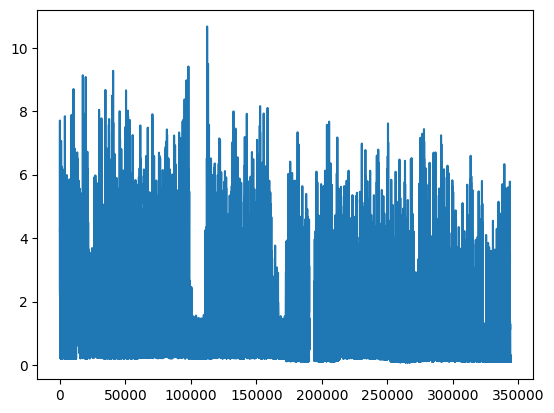

In [ ]:

df.loc[df.index[0]]
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_active_power'].plot(kind='line')

# 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

<Axes: ylabel='Frequency'>

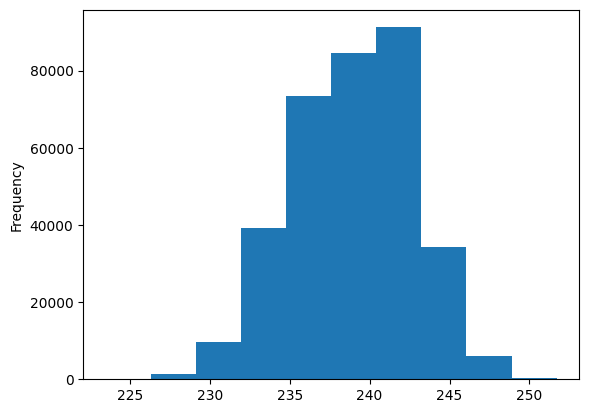

In [ ]:
#Transformação dos dados para Float
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')


df['Voltage'].plot(kind='hist' )

#8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
media_consumo_mensal = df.groupby(df['Date'].dt.to_period('M'))['Global_active_power'].mean()
display(media_consumo_mensal)

,Global_active_power
Date,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.743544


# 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power)

In [ ]:
consumo_diario = df.groupby('Date')['Global_active_power'].sum()
diaQueConsomeMais = consumo_diario.idxmax()
consumo_maximo = consumo_diario.max()

print(f"O dia com maior consumo de energia ativa global foi {diaQueConsomeMais.strftime('%d/%m/%Y')} com um total de {max_consumption:.2f} kW.")

O dia com maior consumo de energia ativa global foi 23/12/2006 com um total de 4773.39 kW.


#10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [ ]:
# Extrai o dia da semana
df['Dia_da_Semana'] = df['Date'].dt.dayofweek

# Categoriza como "Dia de Semana" ou "Fim de Semana"
df['Tipo_Dia'] = np.where(df['Dia_da_Semana'] < 5, 'Dia de Semana', 'Fim de Semana')

# Calcula o consumo médio por tipo de dia
consumo_medio_por_tipo_dia = df.groupby('Tipo_Dia')['Global_active_power'].mean()
display(consumo_medio_por_tipo_dia)

,Global_active_power
Tipo_Dia,
Dia de Semana,1.016442
Fim de Semana,1.403850
